In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('data/Ice Cream Sales - temperatures.csv')
df.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [3]:
df.shape

(365, 2)

In [9]:
df.isnull().sum()

Temperature          0
Ice Cream Profits    0
dtype: int64

In [10]:
df.duplicated().value_counts()

False    364
True       1
Name: count, dtype: int64

In [11]:
df = df.drop_duplicates()
df

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


In [12]:
df.describe()

,Temperature,Ice Cream Profits
count,364.000000,364.000000
mean,71.967033,52.092005
std,13.274139,16.009471
min,39.000000,11.880000
25%,63.000000,40.635000
50%,73.000000,53.605000
75%,82.000000,63.727500
max,101.000000,89.290000


<Axes: xlabel='Temperature'>

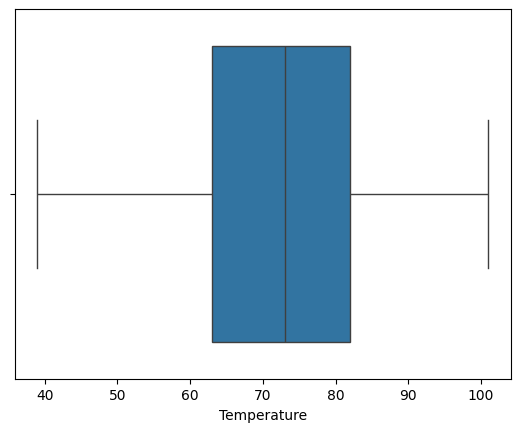

In [13]:
sns.boxplot(x='Temperature',data=df)

<Axes: xlabel='Temperature', ylabel='Count'>

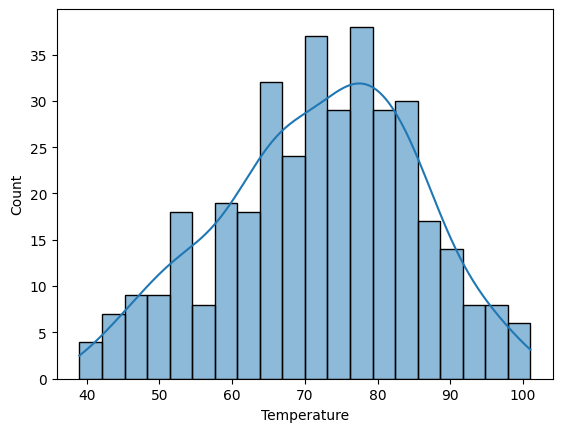

In [14]:
sns.histplot(x='Temperature',data=df,kde=True,bins=20)

<Axes: xlabel='Ice Cream Profits'>

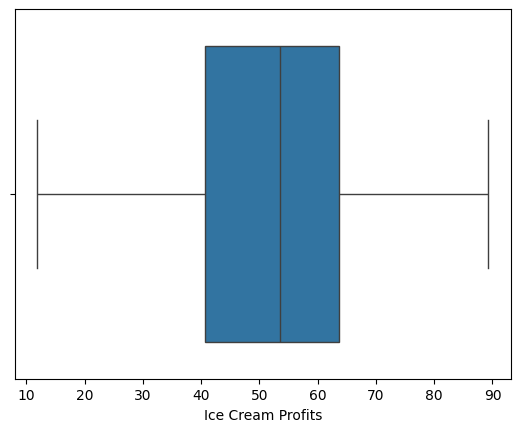

In [15]:
sns.boxplot(x='Ice Cream Profits',data=df)

<Axes: xlabel='Ice Cream Profits', ylabel='Count'>

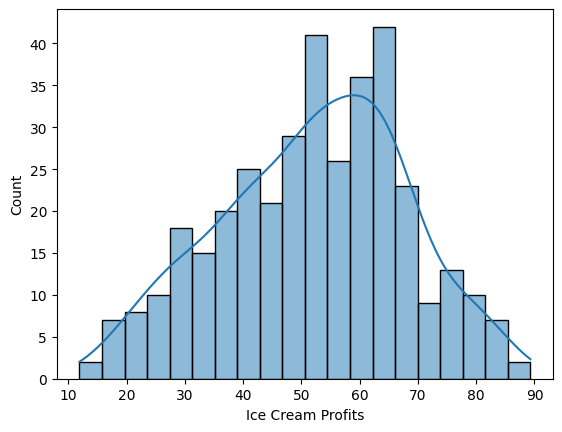

In [16]:
sns.histplot(x='Ice Cream Profits',data=df,kde=True,bins=20)

<Axes: >

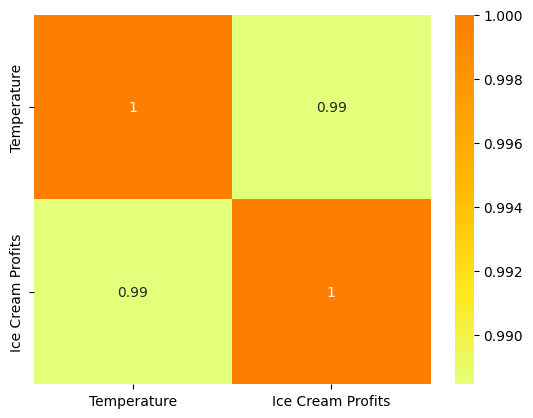

In [248]:
corr = df.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

Text(0.5, 1.0, 'Temperature vs Ice Cream Profits')

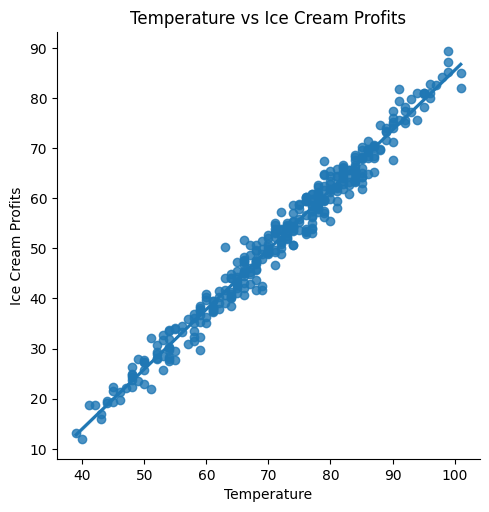

In [249]:
# Plot Temperature and Ice Cream Profits
sns.lmplot(x='Temperature',y='Ice Cream Profits',data=df)
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.title('Temperature vs Ice Cream Profits')

**Conclusion**
- As Temperature increases, Ice Cream Profits are also increasing

In [250]:
X = df.drop(['Ice Cream Profits'],axis=1)
y = df['Ice Cream Profits']

In [251]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [252]:
lin_reg = LinearRegression()

In [253]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [254]:
lin_reg.coef_

array([1.19204428])

In [255]:
lin_reg.intercept_

-33.74193047558359

In [256]:
y_pred = lin_reg.predict(X_test)

In [257]:
y_pred

array([30.62846064, 49.70116912, 48.50912484, 36.58868204, 64.00570048,
       47.31708056, 60.42956764, 25.86028352, 43.74094772, 66.38978904,
       38.9727706 , 23.47619496, 44.932992  , 37.78072632, 44.932992  ,
       44.932992  , 53.27730196, 36.58868204, 61.62161192, 84.27045324,
       65.19774476, 28.24437208, 28.24437208, 72.35001044, 72.35001044,
       46.12503628, 29.43641636, 42.54890344, 52.08525768, 69.96592188,
       31.82050492, 43.74094772, 64.00570048, 58.04547908, 42.54890344,
       73.54205472, 46.12503628, 53.27730196, 38.9727706 , 49.70116912,
       54.46934624, 58.04547908, 66.38978904, 23.47619496, 12.74779644,
       67.58183332, 38.9727706 , 66.38978904, 74.734099  , 30.62846064,
       23.47619496, 41.35685916, 64.00570048, 37.78072632, 67.58183332,
       44.932992  , 60.42956764, 44.932992  , 50.8932134 , 38.9727706 ,
       65.19774476, 55.66139052, 33.0125492 , 23.47619496, 58.04547908,
       44.932992  , 46.12503628, 47.31708056, 61.62161192, 16.32

In [258]:
mean_squared_error(y_pred,y_test)

6.3160937192742255

In [259]:
lin_reg.score(X_test,y_test)

0.976647733065474

## Checking Overfitting or Undefittting

In [260]:
y_train_pred = lin_reg.predict(X_train)

In [261]:
mean_squared_error(y_train_pred,y_train)

5.754530122281796

In [262]:
lin_reg.score(X_train,y_train)

0.9769058503427309

In [263]:
lin_reg.score(X_test,y_test)

0.976647733065474

- Model Training accuracy is equal to Testing accuracy is equal. So there is no issue of overfitting and underfitting.